## Model Introduction 

### Python Study

In [2]:
# pip install pymc3;

     |████████████████████████████████| 860kB 4.5MB/s eta 0:00:01
     |████████████████████████████████| 2.8MB 7.6MB/s eta 0:00:01
     |████████████████████████████████| 6.2MB 3.6MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/ea/0c/5f61f1a3d4385d6bf83b83ea495068857ff8dfb89e74824c6e9eb63286d8/patsy-0.5.1-py2.py3-none-any.whl
  Stored in directory: /Users/hyeongcheolpark/Library/Caches/pip/wheels/88/fb/be/483910ff7e9f703f30a10605ad7605f3316493875c86637014
Successfully built theano
Note: you may need to restart the kernel to use updated packages.


In [3]:
# pip install seaborn

     |████████████████████████████████| 215kB 1.3MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pylab inline 
# magic fucntion in ipython. It loads major numerical and plotting libraries

import pandas as pd

import pymc3 as pm
# probabilistic programming language

# import class for constructing random walks
from pymc3.distributions.timeseries import GaussianRandomWalk
import theano.tensor as tt

#import some special methods
from scipy.special import logit,expit
import scipy.stats as stats

# set some plotting parameters to create ggplot-style plots
import seaborn as sns
import matplotlib as mpl
sns.set_context(context='talk',font_scale=1.5)
plt.style.use('ggplot')
mpl.rcParams['axes.labelsize'] = 24

#interactive plotting tools
from ipywidgets import interactive

Populating the interactive namespace from numpy and matplotlib


In [49]:
N, p = 10000, 0.01
x = np.random.binomial(N,p,size=1000)

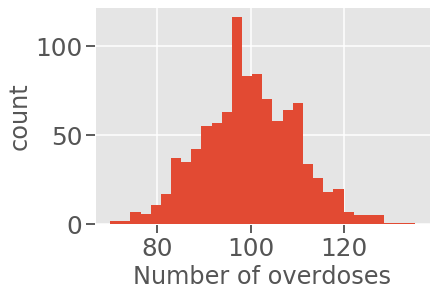

In [50]:
plt.figure(); # ; on plt suppress output
plt.hist(x, bins=30);
plt.xlabel("Number of overdoses");
plt.ylabel("count");

**Important: Shift + tap shows me info about method.**

In [54]:
n_months =12
n_samples = 1000
N,p = 10000,0.01
x = np.random.binomial(N,p, size = (n_samples,n_months))

print('Data generated is a {} by {} array'.format(*x.shape))

Data generated is a 1000 by 12 array


In [59]:
def plot_data_timeseries(ys, x=None, xlabel="time", ylabel="Overdoses", new_plot=True, color="#E14A33", label=None):
    
    '''
    brief intro: plot 95 and IQR
    parameters:
    -----
    ys: sample size by time numpy array 
    x: x axis as time
    xlabel: string
    ylabel: string
    new_plot: boolean
        plotting to a new figure or not
    color: str
    label: str
    return
    -----
    
    
    '''
    if x is None:
        x = np.arange(1,ys.shape[1]+1)
    
    if new_plot: plt.figure;
        # if we wanna make a new plot, then by using plt.figure function,
        # we create a new plot figure
        
    lc, liqr, m, uiqr, uc = np.percentile(ys, [2.5,25,50,75,97.5], axis=0);
    # now it's time to use the (already) existing plot figure
    plt.fill_between(x, lc, uc,alpha=0.2 ,color=color);
    plt.fill_between(x, liqr, uiqr, color=color, alpha=0.2);
    plt.plot(x,m, color= color, label = label);
    plt.xlabel(xlabel);plt.ylabel(ylabel);
    
    

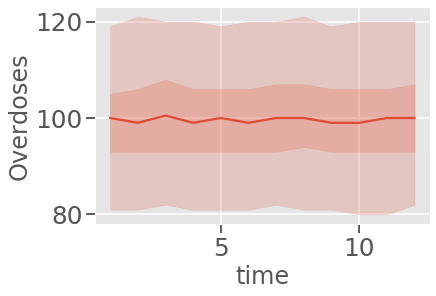

In [61]:
plot_data_timeseries(x)

Broadcasting rule is how numpy treat different arrays in dimensions.

In [65]:
# Note: array is a function to yield a ndarray conviniently, and .flatten() is a method to
# flat the dimension.

np.array([[1,2,3],[1,2,3]]).flatten()

array([1, 2, 3, 1, 2, 3])

In [79]:
# Note: broadcasting rule examples
x = np.arange(4)
# print(x)
xx=x.reshape(4,1)
# print(xx)
y = np.ones(5)
# print(y)
z = np.ones((3,4))
# print(z)

# print(xx+y)
print(x[:,np.newaxis]+y)
print(x+z)

# outer product
a = np.array([5,6,7,8])
b = np.array([1,2,3])

# 4 X 1
#     3
# 4 X 3

print(a[:, np.newaxis] + b) # This is outer product, where the summatiion
# occurs elementwise from two vectors.

[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]]
[[1. 2. 3. 4.]
 [1. 2. 3. 4.]
 [1. 2. 3. 4.]]
[[ 6  7  8]
 [ 7  8  9]
 [ 8  9 10]
 [ 9 10 11]]


In [ ]:
# Let's make a overdose_generation function.

# instruction: numpy docstring guide.

def overdose_generation():
    '''
    give uncertainty to parameters of the number of overdoses
    
    parameter
    -----
    
    return
    ----
    
    
    '''
    
    # N follows normal(10000,1000)
    
    # p follows beta (1, 99)
    
    # apply N and p to Bin(N,p). 
    
    # For each Bin(N,p), repeat 1000 times for one column (month)
    
    # (1000,12) ndarray is our result.
    
    # Dict: N, p, x for keys, flatten N, p, values.
    